In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from math import pi
%matplotlib inline

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
df.shape

(6607, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [6]:
highest_score = df['Exam_Score'].max()
print("highest score in exam:", highest_score)

highest score in exam: 101


In [7]:
# Data Cleaning
#In this section, we clean the data by dealing with missing and invalid values and checking the data format to ensure the quality of the analysis.
#We will make a drop for the missing values ​​because they will not affect the data

In [8]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [11]:
# Data Analysis
#In this section, we will analyze data to understand the relationships between different variables, 
#such as the effect of family income, study hours, and extracurricular activities on exam scores.
#Graphs and statistical measures will be used to gain deeper insights.

In [12]:
mean_scores = df.groupby("Gender")["Exam_Score"].mean()
print(mean_scores)

Gender
Female    67.274721
Male      67.235629
Name: Exam_Score, dtype: float64


In [13]:
correlation = df['Previous_Scores'].corr(df['Exam_Score'])
print(f"correlation: {correlation:.2f}")

correlation: 0.17


In [14]:
df['Average_Score'] = df[['Previous_Scores', 'Exam_Score']].mean(axis=1)
df[['Previous_Scores', 'Exam_Score', 'Average_Score']].head()

C:\Users\aa\AppData\Local\Temp\ipykernel_10432\3545039900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Score'] = df[['Previous_Scores', 'Exam_Score']].mean(axis=1)


,Previous_Scores,Exam_Score,Average_Score
0,73,67,70.0
1,59,61,60.0
2,91,74,82.5
3,98,71,84.5
4,65,70,67.5


In [15]:
numerical_col=[col for col in df.columns if df[col].dtype!='object']
categorical_col=[col for col in df.columns if df[col].dtype=='object']
categorical_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [16]:
selected_columns = ['Previous_Scores', 'Exam_Score', 'Hours_Studied']
correlation_matrix = df[selected_columns].corr()
print("Correlation coefficients between the determinants:")
print(correlation_matrix)

Correlation coefficients between the determinants:
                 Previous_Scores  Exam_Score  Hours_Studied
Previous_Scores         1.000000    0.174283       0.022492
Exam_Score              0.174283    1.000000       0.445104
Hours_Studied           0.022492    0.445104       1.000000


In [17]:
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()
exam_score_correlations = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("Factors most closely related to exam results:")
print(exam_score_correlations)

Factors most closely related to exam results:
Exam_Score           1.000000
Attendance           0.580259
Hours_Studied        0.445104
Average_Score        0.412658
Previous_Scores      0.174283
Tutoring_Sessions    0.156829
Physical_Activity    0.025148
Sleep_Hours         -0.017171
Name: Exam_Score, dtype: float64


In [18]:
summary = {
    'Average Previous Score': df['Previous_Scores'].mean(),
    'Average Exam Score': df['Exam_Score'].mean(),
    'Highest Exam Score': df['Exam_Score'].max(),
    'Lowest Exam Score': df['Exam_Score'].min()
}
print("Summary of Results:")
for key, value in summary.items():
    print(f"{key}: {value}")

Summary of Results:
Average Previous Score: 75.06616494198808
Average Exam Score: 67.25211665098777
Highest Exam Score: 101
Lowest Exam Score: 55


In [19]:
def categorize_Previous_Score(score):
    if 0 <= score <= 50:
        return 'low'
    elif 50 < score <= 75:
        return 'medium'
    elif 75 < score <= 101:
        return 'high'
    else:
        return 'Out of Range' 
df['Score_Category'] = df['Previous_Scores'].apply(categorize_Previous_Score)
print(df[['Previous_Scores', 'Score_Category']].head())

   Previous_Scores Score_Category
0               73         medium
1               59         medium
2               91           high
3               98           high
4               65         medium


C:\Users\aa\AppData\Local\Temp\ipykernel_10432\3751758371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_Category'] = df['Previous_Scores'].apply(categorize_Previous_Score)


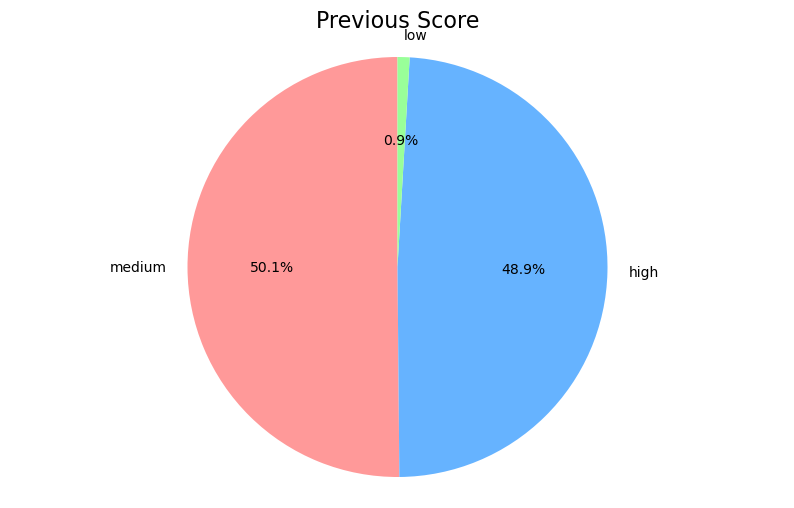

In [20]:
category_counts = df['Score_Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Previous Score', fontsize=16)
plt.axis('Equal')
plt.show()

In [21]:
def categorize_exam_score(score):
    if 0 <= score <= 50:
        return 'Low'
    elif 50 < score <= 75:
        return 'Medium'
    elif 75 < score <= 101:
        return 'High'
    else:
        return 'Out of Range'  
df['Exam_Score_Category'] = df['Exam_Score'].apply(categorize_exam_score)
print(df[['Exam_Score', 'Exam_Score_Category']].head())

   Exam_Score Exam_Score_Category
0          67              Medium
1          61              Medium
2          74              Medium
3          71              Medium
4          70              Medium


C:\Users\aa\AppData\Local\Temp\ipykernel_10432\3523406423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exam_Score_Category'] = df['Exam_Score'].apply(categorize_exam_score)


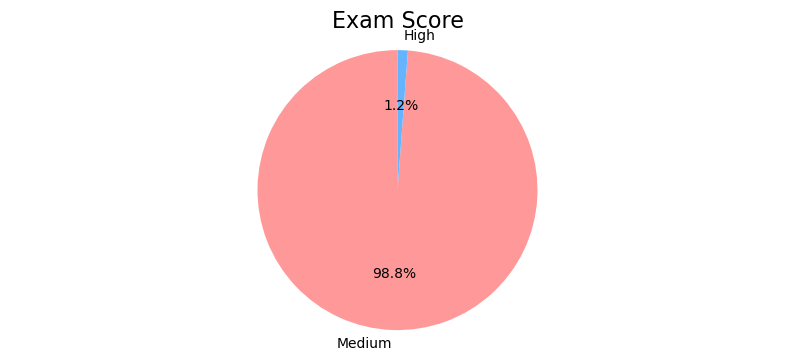

In [22]:
category_counts = df['Exam_Score_Category'].value_counts()
plt.figure(figsize=(10, 4))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Exam Score', fontsize=16)
plt.axis('Equal')
plt.show()

In [23]:
activity_avg_scores = df.groupby('Extracurricular_Activities')['Exam_Score'].mean().reset_index()
print(activity_avg_scores)

  Extracurricular_Activities  Exam_Score
0                         No   66.951770
1                        Yes   67.454951


In [24]:
income_avg_scores = df.groupby('Family_Income')['Exam_Score'].mean().reset_index()
print(income_avg_scores)

  Family_Income  Exam_Score
0          High   67.841463
1           Low   66.853215
2        Medium   67.371005


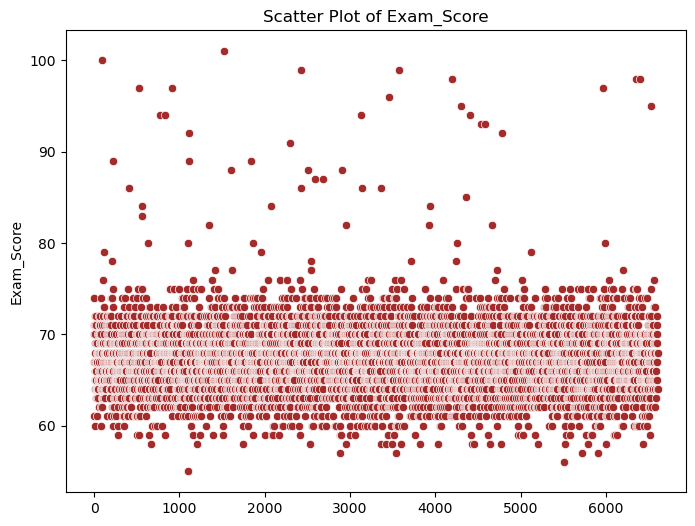

In [25]:
sns.scatterplot( data=df['Exam_Score'],color='brown')
plt.ylabel('Exam_Score')
plt.title('Scatter Plot of Exam_Score')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

C:\Users\aa\AppData\Local\Temp\ipykernel_10432\80051541.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Exam_Score'], color='r', bins=100, hist_kws={'alpha': 0.4});
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


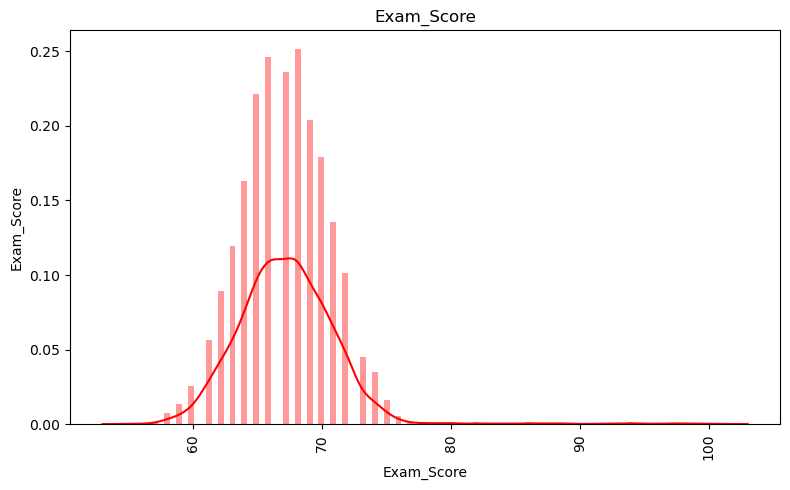

In [26]:
plt.figure(figsize=(8, 5))
sns.distplot(df['Exam_Score'], color='r', bins=100, hist_kws={'alpha': 0.4});
plt.title('Exam_Score')
plt.xticks(rotation=90)
plt.xlabel('Exam_Score')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

Correlation coefficient between study hours and exam grades: 0.44510414026511724


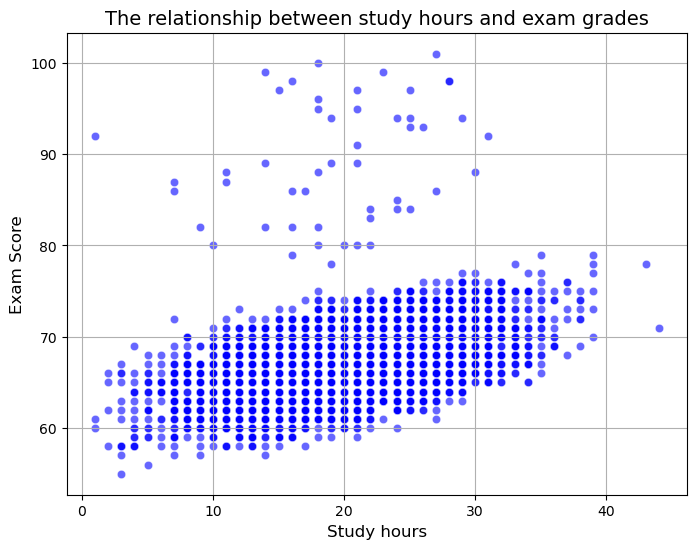

In [27]:
correlation = df['Hours_Studied'].corr(df['Exam_Score'])
print(f"Correlation coefficient between study hours and exam grades: {correlation}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, color='blue', alpha=0.6)
plt.title('The relationship between study hours and exam grades', fontsize=14)
plt.xlabel('Study hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True)
plt.show()

The correlation between hours of sleep and exam scores is: -0.01717144621634845


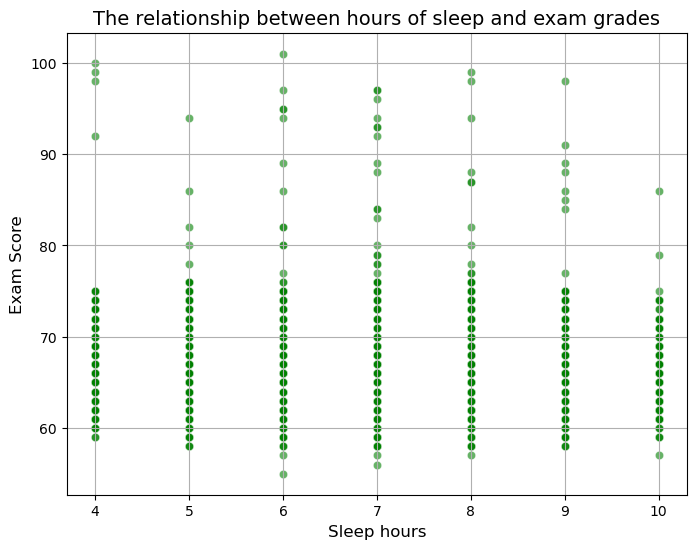

In [28]:
correlation = df['Sleep_Hours'].corr(df['Exam_Score'])
print(f"The correlation between hours of sleep and exam scores is: {correlation}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df, color='green', alpha=0.6)
plt.title('The relationship between hours of sleep and exam grades', fontsize=14)
plt.xlabel('Sleep hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True)
plt.show()

School_Type
Public     4434
Private    1944
dtype: int64


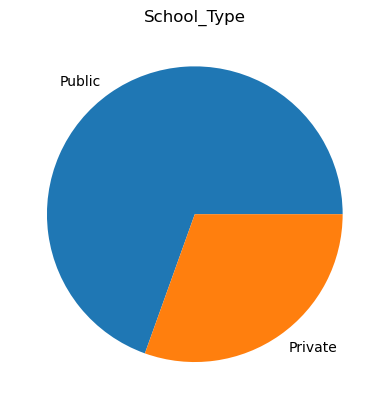

In [29]:
success_by_school_type = df.groupby('School_Type').size()
success_by_school_type = success_by_school_type.sort_values(ascending=False)
print(success_by_school_type)
success_by_school_type.plot(kind='pie')
plt.title('School_Type')
plt.show()

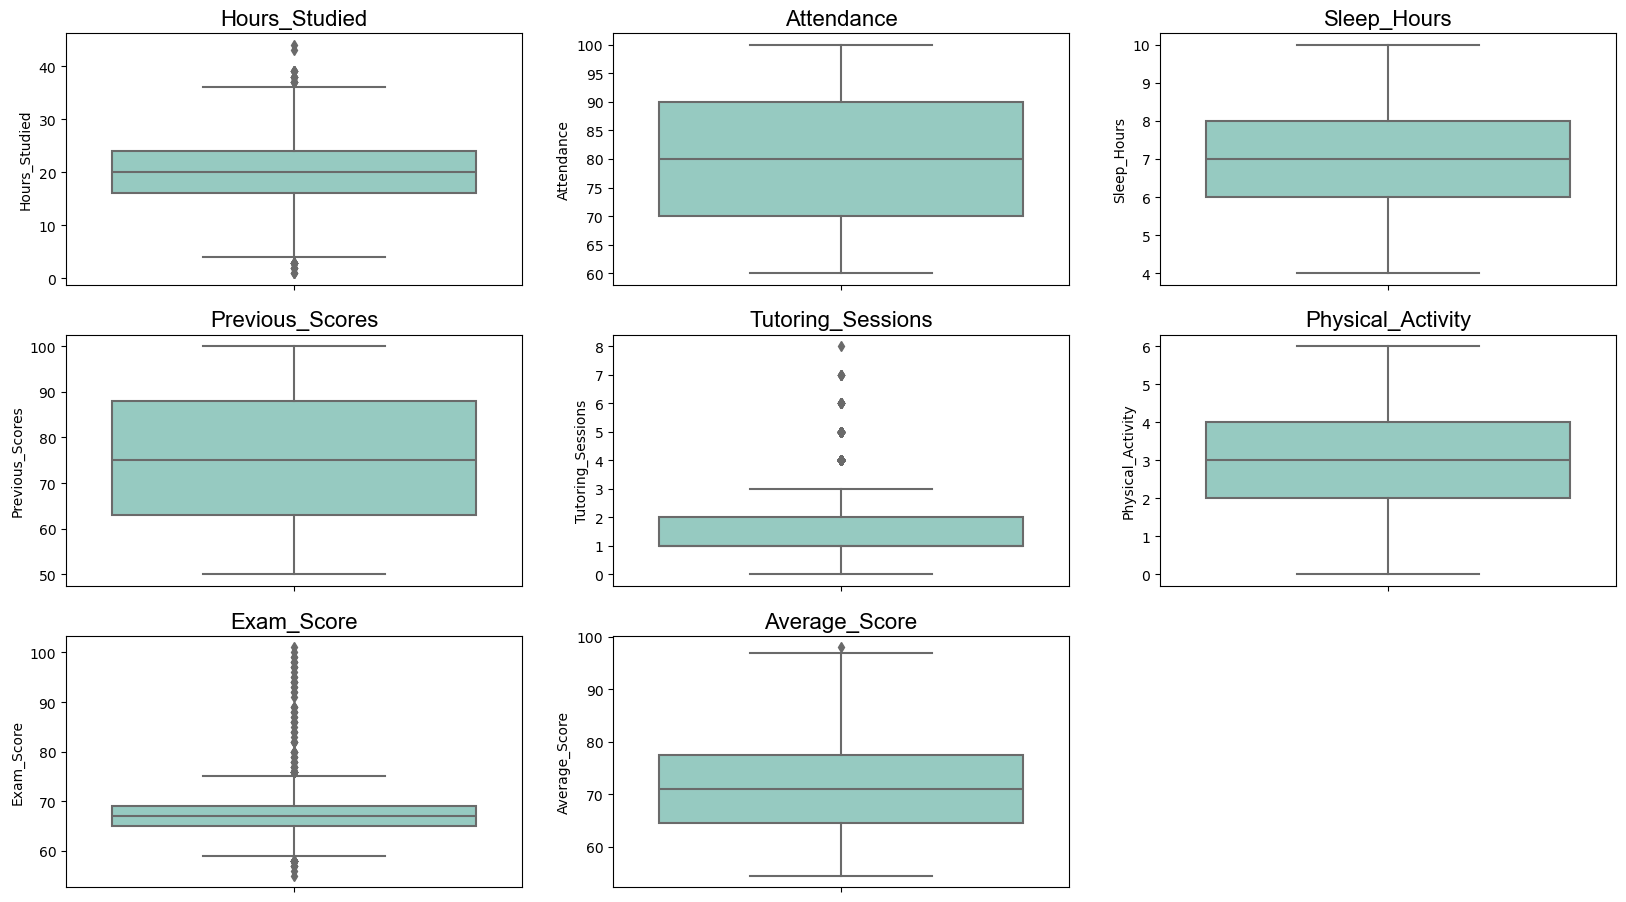

In [30]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[numerical_col[i]],palette='Set3')
    plt.title(numerical_col[i], fontdict={'fontname': 'Arial'}, fontsize=16)
plt.show()

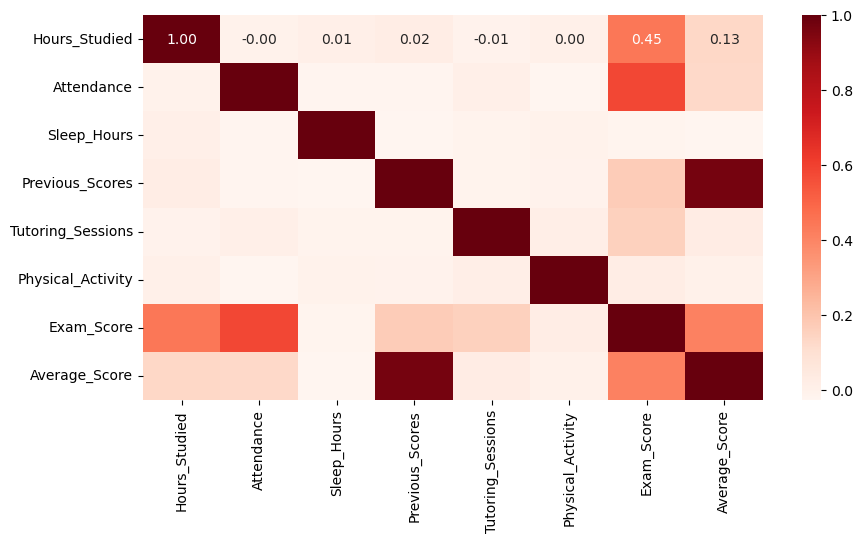

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_col].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

In [32]:
df_Male = df[df["Gender"] == 'Male'].copy()
df_Male

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Average_Score,Score_Category,Exam_Score_Category
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Positive,3,No,High School,Near,Male,67,70.0,medium,Medium
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Neutral,4,No,Postgraduate,Near,Male,74,82.5,high,Medium
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Negative,4,No,High School,Moderate,Male,71,84.5,high,Medium
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,...,Positive,3,No,Postgraduate,Near,Male,71,80.0,high,Medium
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,...,Neutral,2,No,High School,Moderate,Male,67,67.5,medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,18,68,High,High,Yes,8,52,High,Yes,0,...,Positive,3,No,College,Near,Male,67,59.5,medium,Medium
6588,15,88,Low,Medium,Yes,6,61,Medium,Yes,0,...,Neutral,4,Yes,Postgraduate,Far,Male,65,63.0,medium,Medium
6591,13,74,Medium,High,Yes,8,98,High,Yes,1,...,Negative,2,No,High School,Near,Male,66,82.0,high,Medium
6592,29,100,Medium,Low,Yes,8,100,Low,Yes,0,...,Neutral,5,Yes,High School,Near,Male,72,86.0,high,Medium


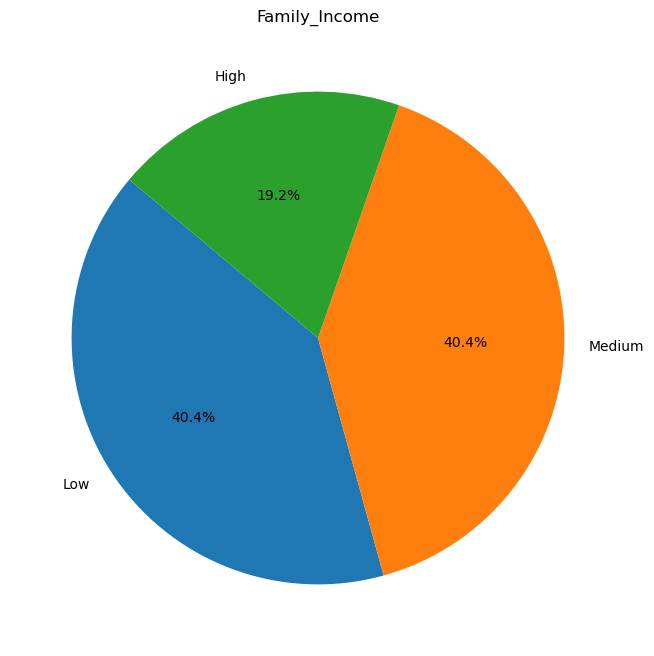

In [33]:
counts = df_Male['Family_Income'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Family_Income')
plt.show()

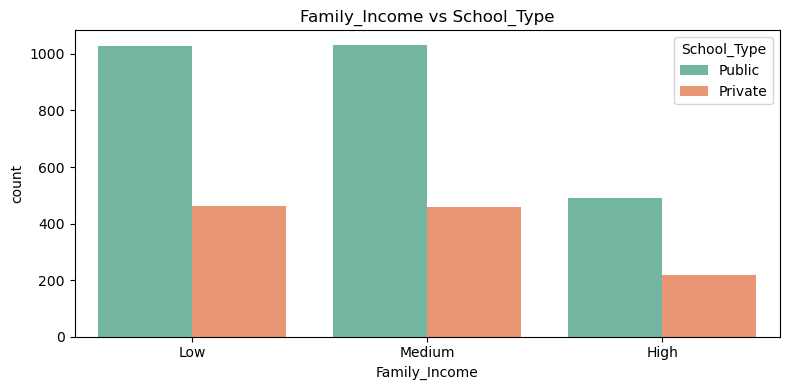

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Family_Income'],hue=df_Male['School_Type'],palette='Set2')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

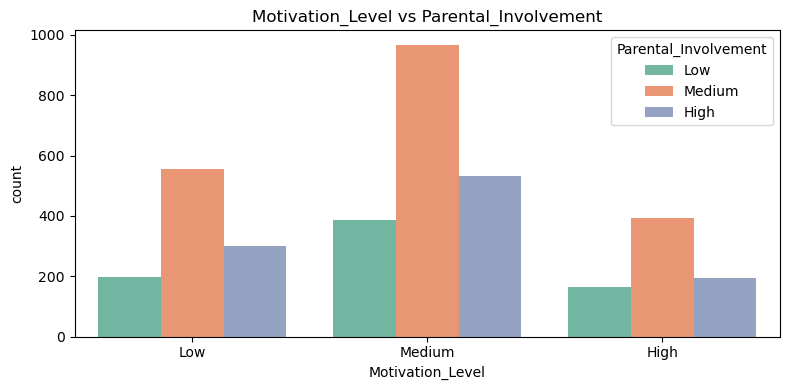

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Motivation_Level'],hue=df_Male['Parental_Involvement'],palette='Set2')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

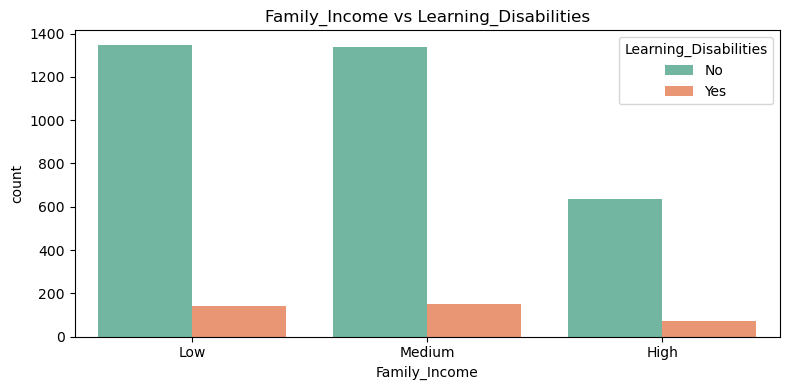

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Family_Income'],hue=df_Male['Learning_Disabilities'],palette='Set2')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

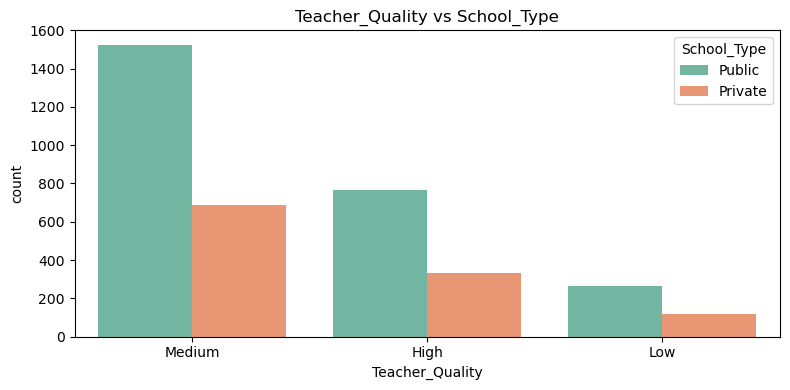

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Teacher_Quality'],hue=df_Male['School_Type'],palette='Set2')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

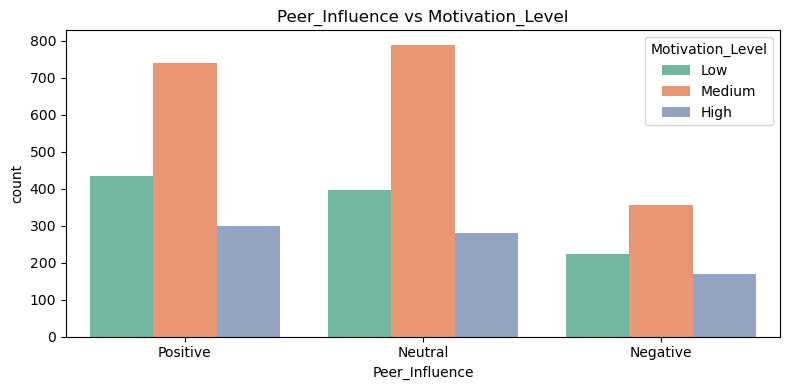

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Peer_Influence'],hue=df_Male['Motivation_Level'],palette='Set2')
plt.title('Peer_Influence vs Motivation_Level')
plt.tight_layout()

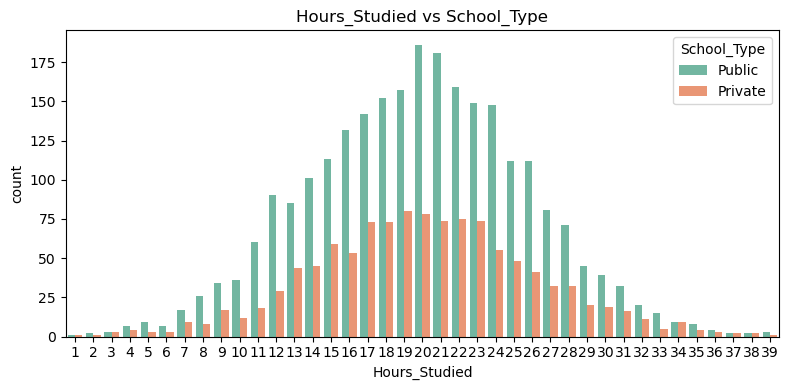

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Hours_Studied'],hue=df_Male['School_Type'],palette='Set2')
plt.title('Hours_Studied vs School_Type')
plt.tight_layout()

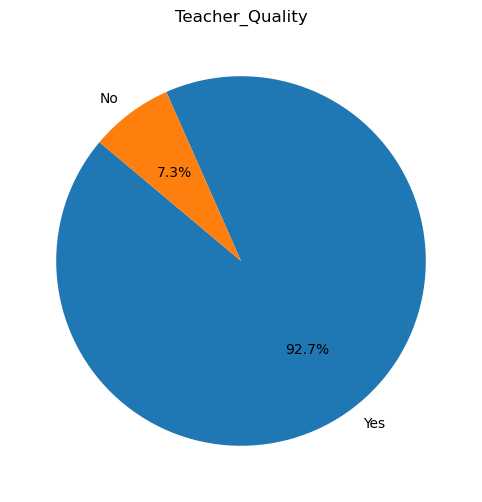

In [40]:
counts = df_Male['Internet_Access'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Teacher_Quality')
plt.show()

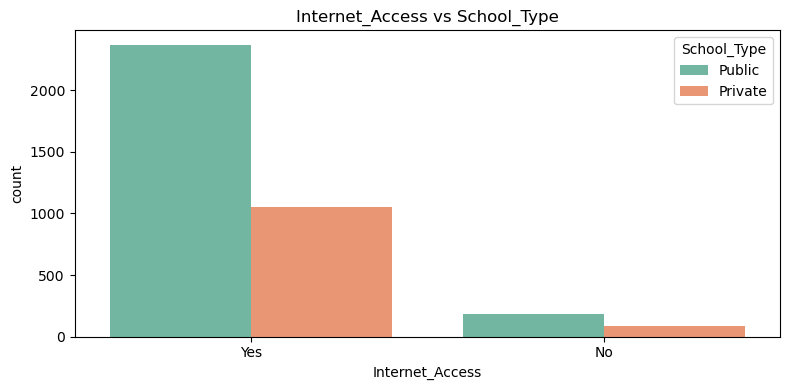

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Internet_Access'],hue=df_Male['School_Type'],palette='Set2')
plt.title('Internet_Access vs School_Type')
plt.tight_layout()

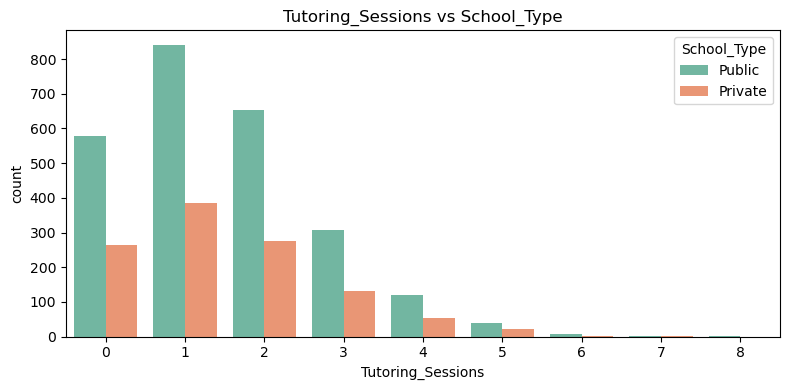

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Male['Tutoring_Sessions'],hue=df_Male['School_Type'],palette='Set2')
plt.title('Tutoring_Sessions vs School_Type')
plt.tight_layout()

In [43]:
df_Female = df[df["Gender"] == 'Female'].copy()
df_Female

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Average_Score,Score_Category,Exam_Score_Category
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Negative,4,No,College,Moderate,Female,61,60.0,medium,Medium
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Neutral,4,No,College,Near,Female,70,67.5,medium,Medium
15,17,68,Medium,Medium,No,8,70,Medium,Yes,2,...,Positive,4,No,High School,Near,Female,64,67.0,medium,Medium
17,22,70,Low,Medium,Yes,6,82,Medium,Yes,1,...,Neutral,3,No,High School,Near,Female,65,73.5,high,Medium
18,15,80,Medium,Medium,Yes,9,91,Low,Yes,3,...,Positive,2,No,College,Moderate,Female,67,79.0,high,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,20,83,Medium,Low,No,6,51,Low,Yes,2,...,Neutral,4,No,High School,Moderate,Female,65,58.0,medium,Medium
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Positive,2,No,High School,Near,Female,68,72.0,high,Medium
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,Positive,2,No,High School,Near,Female,69,75.0,high,Medium
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Negative,2,No,Postgraduate,Near,Female,68,66.5,medium,Medium


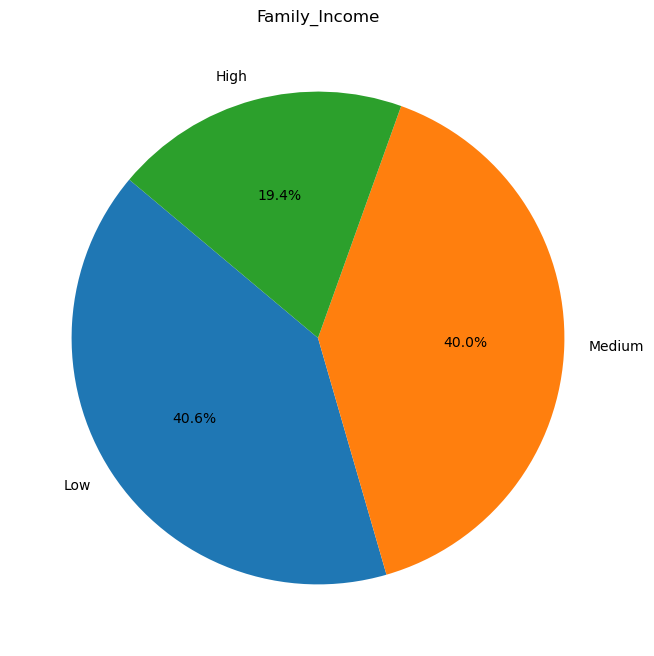

In [44]:
counts = df_Female['Family_Income'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Family_Income')
plt.show()

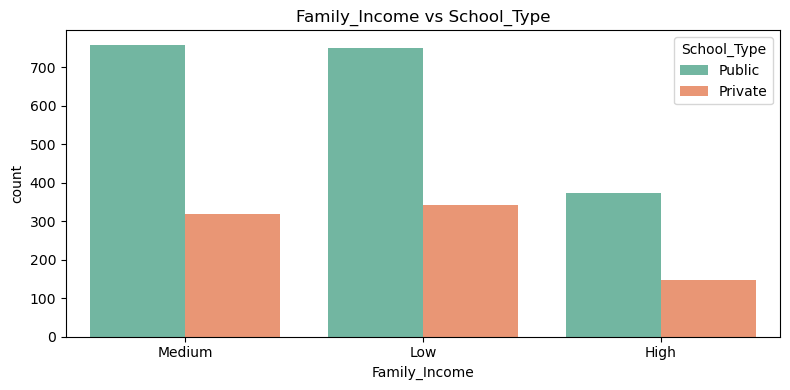

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Family_Income'],hue=df_Female['School_Type'],palette='Set2')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

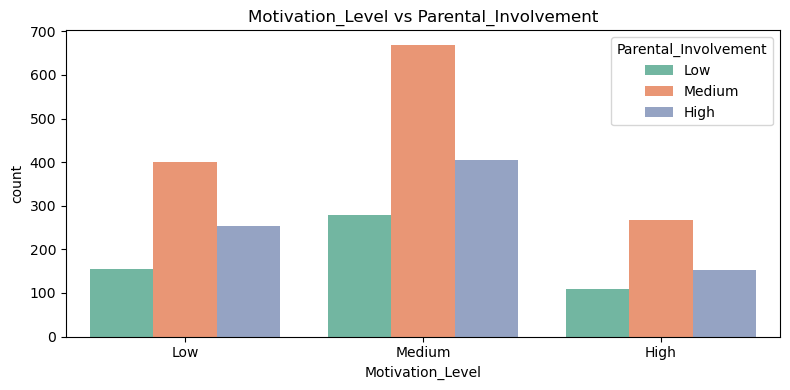

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Motivation_Level'],hue=df_Female['Parental_Involvement'],palette='Set2')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

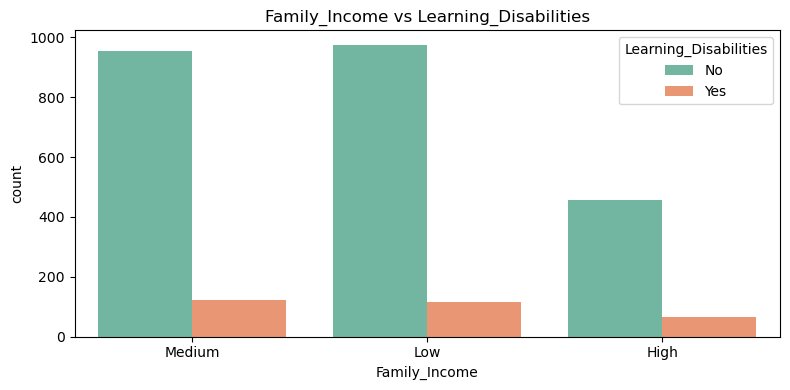

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Family_Income'],hue=df_Female['Learning_Disabilities'],palette='Set2')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

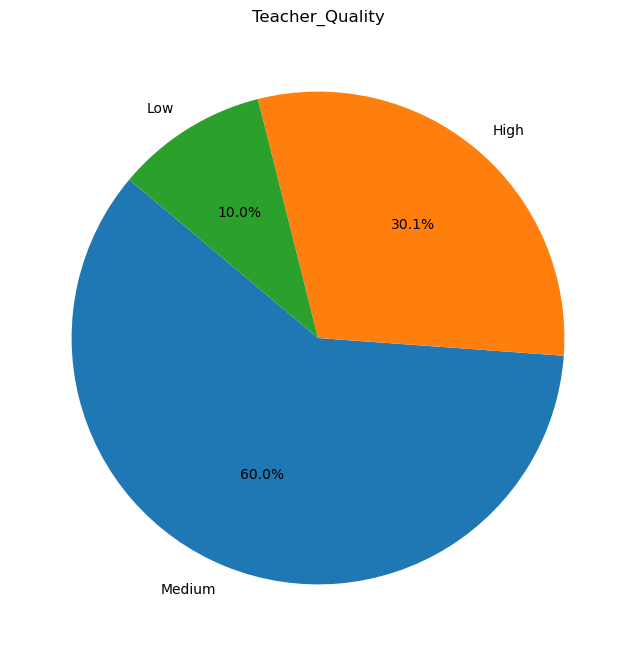

In [48]:
counts = df_Female['Teacher_Quality'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Teacher_Quality')
plt.show()

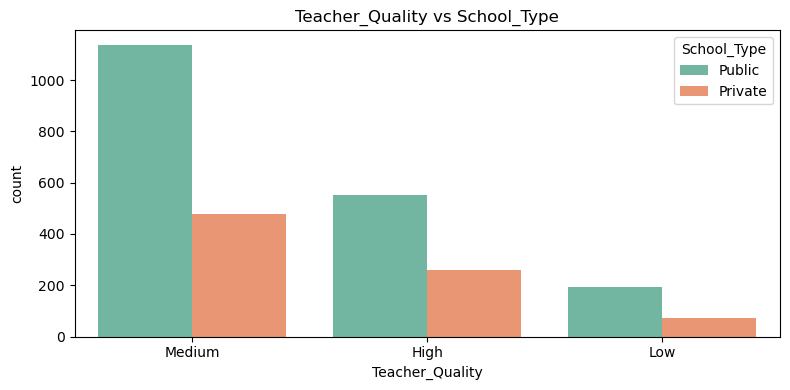

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Teacher_Quality'],hue=df_Female['School_Type'],palette='Set2')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

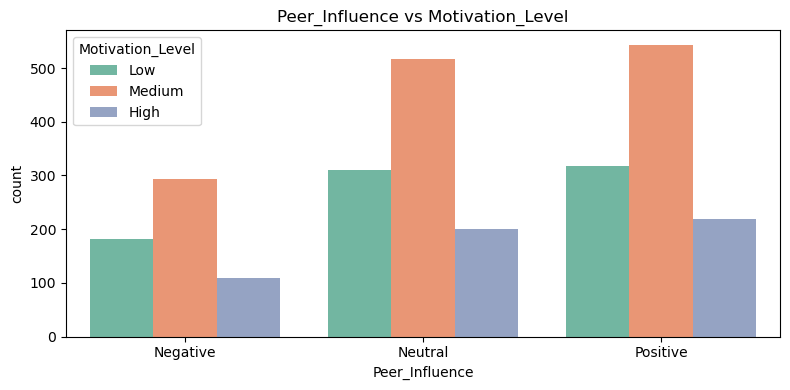

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Peer_Influence'],hue=df_Female['Motivation_Level'],palette='Set2')
plt.title('Peer_Influence vs Motivation_Level')
plt.tight_layout()

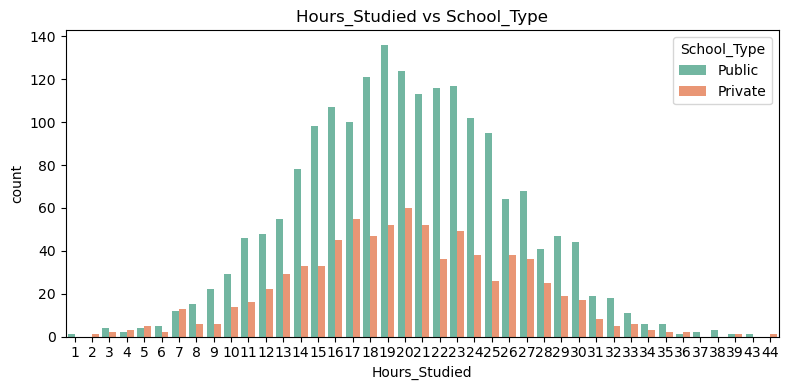

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Hours_Studied'],hue=df_Female['School_Type'],palette='Set2')
plt.title('Hours_Studied vs School_Type')
plt.tight_layout()

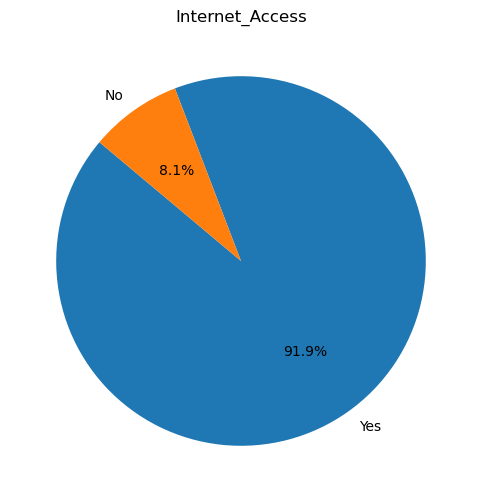

In [52]:
counts = df_Female['Internet_Access'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Internet_Access')
plt.show()

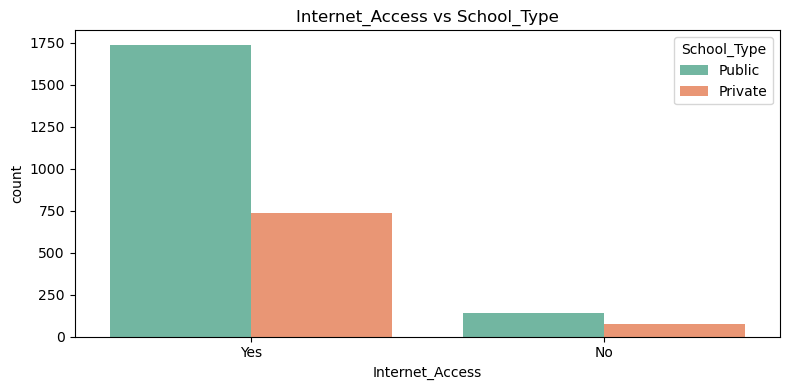

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Internet_Access'],hue=df_Female['School_Type'],palette='Set2')
plt.title('Internet_Access vs School_Type')
plt.tight_layout()

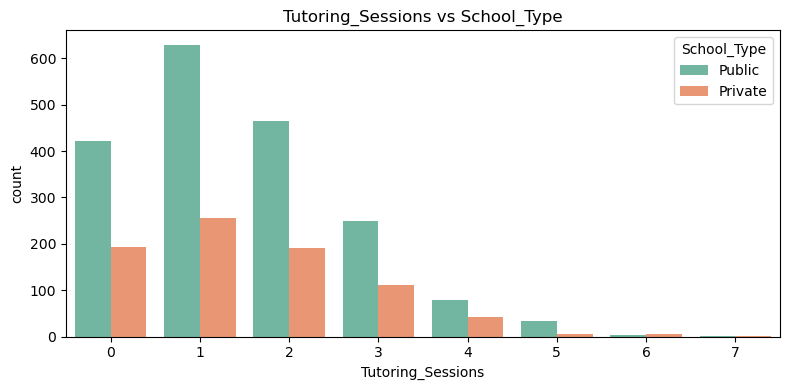

In [54]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_Female['Tutoring_Sessions'],hue=df_Female['School_Type'],palette='Set2')
plt.title('Tutoring_Sessions vs School_Type')
plt.tight_layout()

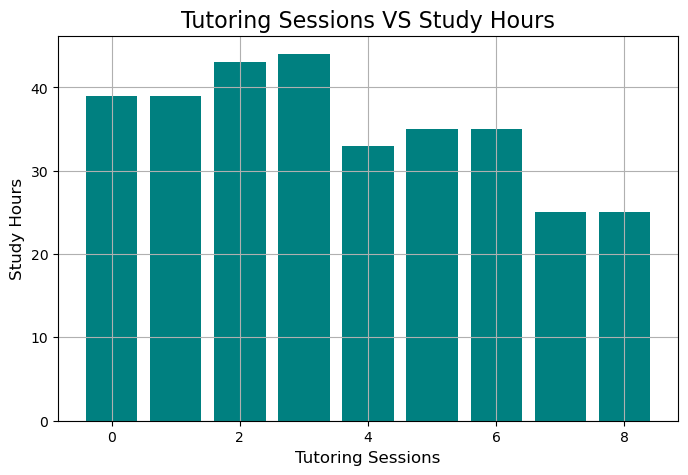

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(tutoring_sessions, study_hours, color='Teal')
plt.title('Tutoring Sessions VS Study Hours', fontsize=16)
plt.xlabel('Tutoring Sessions', fontsize=12)
plt.ylabel('Study Hours', fontsize=12)
plt.grid(True)
plt.show()


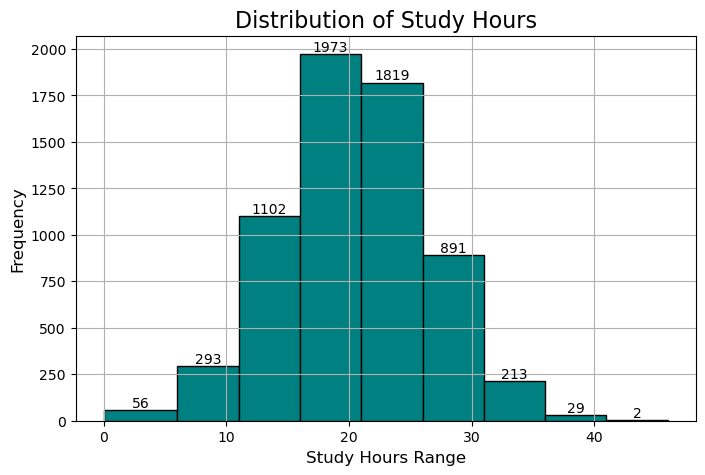

In [59]:
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(df['Hours_Studied'], bins=[0, 6, 11, 16, 21, 26, 31, 36, 41, 46],color='Teal', edgecolor='black' )
for count, bin_patch in zip(counts, patches):
    height = bin_patch.get_height()
    plt.text(bin_patch.get_x() + bin_patch.get_width() / 2, height, f'{int(count)}',
             ha='center', va='bottom', fontsize=10)
plt.title('Distribution of Study Hours', fontsize=16)
plt.xlabel('Study Hours Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# عرض الرسم البياني
plt.show()